<a href="https://colab.research.google.com/github/BrunoAzambuja/Segmentacao_de_clientes_com_analise_RFM/blob/main/Segmenta%C3%A7%C3%A3o_de_clientes_com_analise_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentação de clientes com análise RFM
#### Uso do machine learning para ações de marketing mais assertivas.

*by [Bruno Azambuja](www.brunoazambuja.com)*


<center><img alt = "Colaboratory logo" width = "80%" src = "https://hubcriacao.com.br/wp-content/uploads/2018/08/228290-a-segmentacao-de-mercado-define-o-sucesso-das-acoes-de-marketing-banner-1440x500@2x.png"></center>

A segmentação do cliente é o processo pelo qual divide-se os clientes em segmentos, usando aspectos comuns entre eles. O objetivo disso é oferecer uma comunicação mais assertiva e personalizada aos clientes, melhorando sua experiência e entregando valor relevante para eles. 

A segmentação oferece uma maneira simples de organizar e gerenciar os relacionamentos da empresa com os clientes. Em vez de analisar toda a base de clientes como um todo, é melhor segmentá-los em grupos homogêneos, entender os traços de cada grupo e engajá-los com campanhas relevantes, mais alinhadas ao seu perfil.

Um dos métodos de segmentação mais populares, fáceis de usar e eficazes para permitir que os profissionais desta área analisem o comportamento dos seus clientes é a análise de **RFM**, o que significa analisar os clientes sob a perspectiva da sua **Recência**, **Frequência** e o **Monetário**.

<center><img width="60%" src="https://d35fo82fjcw0y8.cloudfront.net/2018/03/01013508/Incontent_image.png"></center> 

De acordo com [clevertap.com](https://clevertap.com/blog/rfm-analysis/) cada uma destas categorias corresponde à alguma característica chave do cliente. Essas métricas de **RFM** são indicadores importantes do comportamento de um cliente porque a frequência e o valor monetário afetam o valor da vida útil de um cliente e a recência afeta a retenção, uma medida importante de engajamento.

Os fatores que descrevem os elementos de RFM

* quanto mais recente a compra, mais responsivo o cliente é para promoções;
* quanto mais frequentemente o cliente compra, mais engajados e satisfeitos eles são;
* valor monetário diferencia gastadores elevados de compradores de baixo valor.

## Premissas estabelecidas para o projeto

Neste projeto, como já introduzimos, iremos tratar da Segmentação de clientes aplicando RFM aos dados de clientes em um negócio de varejo online. Além disso, veremos quais insights podem ser extraídos a partir deste estudo, como por exemplo:

* Quem são seus melhores clientes?
* Quais de seus clientes podem contribuir para sua taxa de churn?
* Quem tem potencial para se tornar um cliente valioso?
* Quais dos seus clientes podem ser retidos?
* Quais de seus clientes são mais propensos a responder a campanhas de engajamento?

Estas são questões-chave que podemos responder com esta análise.

Para este estudo, primeiramente, analisei as principais métricas do negócio de varejo online usando diversas técnicas de análise exploratória de *Data Science*.

Na sequência, desenvolvi o modelo de segmentação. Nesta etapa analisei as questões de recência, frequência e valor monetário separadamente e, ao final, estas categorias foram analisadas de forma combinada aplicando a técnica de *Machine Learning* conhecida como K-Means.



## Importando e tratando os dados



O conjunto de dados usados neste projeto contém todas as compras feitas em uma empresa de varejo online com sede no Reino Unido, sendo possível acessar e fazer download destes dados na página do [Kaggle](https://www.kaggle.com/datasets/vijayuv/onlineretail). Nele se tem acesso aos dados abertos ao público que tem interesse em utilizá-los.

<center><img alt = "Colaboratory logo" width = "20%" src = "https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png"></center>

O *dataset* utilizado representa as compras feitas para uma empresa de varejo online com sede no Reino Unido durante um período de oito meses. Como se pode notar, este é um conjunto de dados em que a última atualização foi feita em 2010.

**Dicionário das variáveis**
* *Esta etapa tem por objetivo criar uma consciência inicial e permitir um entendimento de como os dados estão estruturados.*

    * `InvoiceDate`- Data e hora da fatura.
    * `InvoiceNo` - Número de identificação da fatura.
    * `StockCode`- Código de estoque do produto.
    * `Description` - Breve descrição do produto.
    * `Quantity` - Quantidade de itens comprados.
    * `UnitPrice` - Preço unitário de um determinado produto em libras esterlinas.
    * `CurtomerID` - ID do cliente que efetuou a compra.
    * `Country` - País onde a compra foi feita.

    





In [ ]:
# importando os pacotes necessários
import plotly.graph_objects as go
import plotly.offline as py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import glob

#####**Importando o Dataset**

In [ ]:
# importando os dados para um dataframe
path = ('/content/data.csv')
df = pd.read_csv(path, encoding='latin-1')
df.index = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)
df.drop('InvoiceDate', axis=1, inplace=True)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de buscar insights propostos inicialmente.

#####**Verificando e tratando os dados**

Com os dados importados, conseguimos fazer uma análise visual identificando suas principais caracteríscas, para então iniciarmos o seu tratamento. Primeiramente vamos gerar as primeiras e últimas entradas, assim como o número de linhas e colunas que o **dataset** apresenta.

In [ ]:
# vendo as primeiras e últimas entradas
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France


Nas funções abaixo, conseguimos identificar mais alguns parâmetros relevantes do *dataset*.

In [ ]:
# checando dados faltantes e os seus respectivos tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# verificando a descrição do dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Quanto à qualidade do dataset, este apresentou valores ausentes nos campos `Description` e `Customer ID`, o que nos demanda um tratamento destes dados, já que eles apresentam relevância com o objetivo proposto deste estudo.

Na função abaixo, perceba que nos demais campos a soma dos valores nulos por coluna é zero.

In [ ]:
# verificando os valores ausentes
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

CustomerID     0.249267
Description    0.002683
InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
UnitPrice      0.000000
Country        0.000000
dtype: float64

25% dos valores ausentes nos dados do cliente é bastante significativo, porém, tentar segmentá-los seria muito arbitrário. É melhor apenas excluí-los. A descrição faltante, por outro lado, é tão pequena, que simplesmente não nos incomodaremos em eliminá-las.

In [ ]:
# limpando os dados
df_clean = df.copy()
df_clean.dropna(axis=0, inplace=True)

In [ ]:
# checando os valores ausentes
(df_clean.isnull().sum()/ df_clean.shape[0]).sort_values(ascending=False)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

A variável `Quantity` tem valores negativos, o que não faz sentido. Para corrigir isso, vamos descartar as linhas que têm valores negativos para quantidade.

Além disso, vamos definir `CustomerID` como integer. Por fim, vamos transformar `Description` em letras minúsculas.

In [ ]:
# corrigindo a coluna Quantity
df_clean = df_clean[df_clean.Quantity > 0]

# corrigindo a coluna CustomerID
df_clean['CustomerID'] = df_clean['CustomerID'].astype('int64')

# corrigindo a coluna Description
df_clean['Description'] = df_clean.Description.str.lower()

Com os dados tratados, vamos revisá-los a fim de confirmar o trabalho desta etapa.

In [ ]:
# checando os dados tratados
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397924 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   UnitPrice    397924 non-null  float64
 5   CustomerID   397924 non-null  int64  
 6   Country      397924 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 24.3+ MB


#####**Criando novos recursos**

Uma maneira interessante de enriquecer nossa exploração de dados e aumentar a qualidade da nossa classificação é criar novos recursos.

Em nosso conjunto de dados temos acesso à quantidade e preço dos produtos, para que possamos chegar ao valor gasto em cada item, vamos criar uma variável chamada `AmountSpent`.

In [ ]:
# crìando uma nova feature
df_clean['AmountSpent'] = df_clean['Quantity'] * df_clean['UnitPrice']
df_clean["Date"] = pd.DatetimeIndex(df_clean.index).date

In [ ]:
# checando os dados
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,AmountSpent,Date
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,white hanging heart t-light holder,6,2.55,17850,United Kingdom,15.30,2010-12-01
2010-12-01 08:26:00,536365,71053,white metal lantern,6,3.39,17850,United Kingdom,20.34,2010-12-01
2010-12-01 08:26:00,536365,84406B,cream cupid hearts coat hanger,8,2.75,17850,United Kingdom,22.00,2010-12-01
2010-12-01 08:26:00,536365,84029G,knitted union flag hot water bottle,6,3.39,17850,United Kingdom,20.34,2010-12-01
2010-12-01 08:26:00,536365,84029E,red woolly hottie white heart.,6,3.39,17850,United Kingdom,20.34,2010-12-01


Tendo as etapas de verificações e o tratamento dos dados realizados, conforme as premissas estabelecidas para este estudo, podemos iniciar a análise exploratória.

## Análise exploratória

Esta etapa foi dividida entre tópicos que visam tirar *insights* e elevar a consciência situacional a respeito das vendas online. 

Nesta etapa aplicamos o WordCloud que é uma ferramenta de visualização útil, ela mostra as palavras mais frequentes em um texto, onde o tamanho relativo da palavra se correlaciona com a sua frequência. 

Já os últimos tópicos consistiram em um overview dos dados brutos avaliando o desempenho das receitas de vendas, assim como os países que mais geraram compras online. 

Nestas análises fiz estratificações e comparativos que mostram a contribuição dos novos clientes, assim como os já existentes sobre os resultados das vendas online.

#####**Produtos mais vendidos**

É sempre bom entender o que os nossos clientes estão realmente comprando de nós. Podemos fazer isso encontrando os produtos mais vendidos. Vamos dar uma olhada neles.

In [ ]:
# criando um dataframe para NLP
df_nlp = df_clean[['Description', 'Country']].copy()
df_nlp.head()

,Description,Country
InvoiceDate,,
2010-12-01 08:26:00,white hanging heart t-light holder,United Kingdom
2010-12-01 08:26:00,white metal lantern,United Kingdom
2010-12-01 08:26:00,cream cupid hearts coat hanger,United Kingdom
2010-12-01 08:26:00,knitted union flag hot water bottle,United Kingdom
2010-12-01 08:26:00,red woolly hottie white heart.,United Kingdom


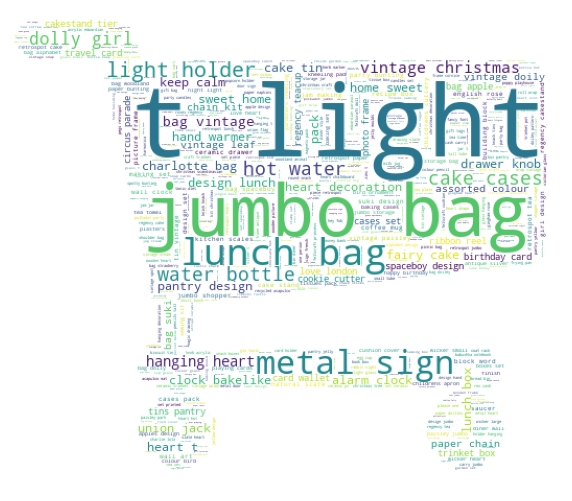

In [ ]:
# preparando as palavras para a wordcloud
all_descriptions = " ".join(d for d in df_nlp['Description'])

# stopwords
stopwords = set(STOPWORDS)
stopwords.update(["red","blue", "green", "white", "black","pink"])

# criando uma máscara
ecommerce_mask = np.array(Image.open("/content/shopping_cart.png"))

# criando a nova wordcloud
wordcloud=WordCloud(stopwords=stopwords,
                    background_color="white",
                    width=1000, height=1000, max_words=2000,
                    mask=ecommerce_mask, max_font_size=200,
                    min_font_size=1).generate(all_descriptions)

# plotando o wordcloud
fig, ax = plt.subplots(figsize=(10,10));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();

# gerando imagem
plt.imshow(wordcloud);
wordcloud.to_file('cart_wordcloud.png')

Nesse caso, nossa máscara foi um carrinho de compras, já que estamos falando de dados de compras.

Podemos ver que alguns dos itens mais vendidos são:

* T-Light
* Jumbo Bag
* Lunch Bag
* Metal Sign
* Light Holder

Outros itens também me chamaram a atenção, como Fairy Cake, Cake Cases, Water Bottle, Clock Bakelike, Alarm Clock etc.

#####**Países com maior número de compras**

Esta análise mostra quais são os países que mais contribuíram no número de produtos vendidos online.

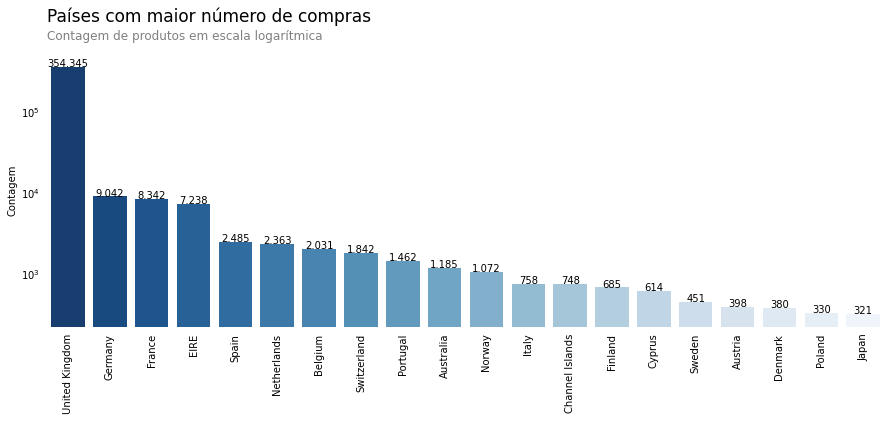

In [ ]:
# definindo os parâmetros do gráfico
country_counts = df_clean.Country.value_counts().sort_values(ascending=False).iloc[0:20]
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(country_counts.index, country_counts.values, palette="Blues_r")
plt.ylabel("Contagem")
ax.set_title('Países com maior número de compras', fontsize=17, x=0.0, y=1.1, loc="left")
plt.suptitle("Contagem de produtos em escala logarítmica", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left")
plt.xticks(rotation=90);
plt.yscale("log")

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

# colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

# plotando gráfico
plt.savefig('Best_Countries.png')

Não é surpresa que o Reino Unido, país onde a empresa está sediada, esteja em primeiro lugar. Este gráfico está em escala logarítmica, para tornar os dados mais digeríveis. Em segundo lugar, temos a Alemanha, seguida pela França. Vamos dar uma olhada no principal país.

#####**Produtos mais vendidos no UK**

Já que estamos falando do maior mercado consumidor da empresa, não é surpresa que eles ditassem as tendências de vendas.

Na sequência, além da bandeira da UK, podemos ver nomes de mercadorias como:

* **T-Light**
* **Jumbo Bag**
* **Lunch Bag**
* **Water Bottle**
* **Light Holder**

Assim como vimos na lista geral de produtos mais vendidos.

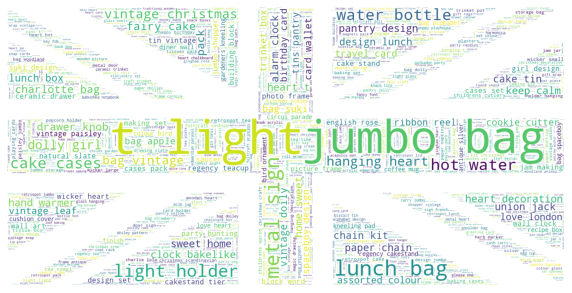

In [ ]:
# preparando os dados
countries = df_nlp.groupby('Country')

# gerando o dataset
uk = countries.get_group('United Kingdom')

# preparando as palavras para wordcloud
uk_descriptions = " ".join(d for d in uk['Description'])

# criando uma máscara
uk_mask = np.array(Image.open("/content/uk.png"))

# criando uma nova wordcloud
wordcloud=WordCloud(stopwords=stopwords,
                    background_color="white",
                    width=2500, height=2500, max_words=2000,
                    mask=uk_mask, max_font_size=200,
                    min_font_size=1).generate(uk_descriptions)

# plotando a wordcloud
fig, ax = plt.subplots(figsize=(10,10));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();

# gerando imagem
plt.imshow(wordcloud);
wordcloud.to_file('uk_wordcloud.png')

Nesta etapa introduzimos processamento de linguagem natural, que é muito mais do que fizemos aqui. Esta é apenas a ponta do iceberg, bem mais pode ser feito, mesmo com os dados que temos.

No entanto, nosso objetivo aqui é ter uma visão geral simples, rápida e abrangente de nossos dados, para que possamos trabalhar no objetivo mais importante: RFM Segmentação de Clientes.

#####**Receita mensal de vendas**

Nesta análise conseguimos ter um overview monetário das vendas. Porém, para que isso seja possível, primeiramente foi gerado um dataframe com os dados monetários já calculados de cada período mensal.

In [ ]:
# gerando dataframe de receita
path = ('/content/data.csv')
df_revenue = pd.read_csv(path, encoding='latin-1')

In [ ]:
# convertendo tipo
df_revenue['InvoiceDate'] = pd.to_datetime(df_revenue['InvoiceDate'])

# criando coluna InvoiceYearMonth
df_revenue['InvoiceYearMonth'] = df_revenue['InvoiceDate'].map(lambda date: 100*date.year + date.month)

# calculando Revenue
df_revenue['Revenue'] = df_revenue['UnitPrice'] * df_revenue['Quantity']
df_revenue.groupby('InvoiceYearMonth')['Revenue'].sum()

# criando novo dataframe
df_revenue_new = df_revenue.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
# df_revenue = df_revenue.set_index('InvoiceYearMonth')

# visualizando o novo dataframe
df_revenue_new

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


Tendo o dataframe com os valores acumulados de cada mês já calculado, podemos seguir com a visualização deles em um gráfico interativo. Este tipo de gráfico tem a vantagem de preservar um maior número de dados possível em sua visualização, assim como selecionar o período desejado.

In [ ]:
# gerando o gráfico
plot_data = [go.Scatter(x=df_revenue_new['InvoiceYearMonth'],y=df_revenue_new['Revenue'],)]
plot_layout = go.Layout(xaxis={"type": "category"},title='Receita mensal de vendas')
fig = go.Figure(data=plot_data, layout=plot_layout)
py.iplot(fig)

Este gráfico mostra que após agosto de 2011 as receitas apresentaram um crescimento significativo comparado ao período anterior, onde apresentou um faturamento estável desde o período inicial.

Outro ponto importante a se destacar é que o último dado, de dezembro de 2011, apresentou valor bem baixo pois, conforme conseguimos observar no dataset, estão com os valores incompletos, apresentando somente os valores até o dia 9 de dezembro de 2011. 

#####**Receita entre novos clientes e existentes**

Primeiramente foi definido o que é um novo cliente. No dataset assumimos que um novo cliente é quem faz a sua primeira compra na janela de tempo. Desta forma, em cada compra de cada mês categorizei os clientes entre os que haviam feito a primeira compra (Novo) e os que já haviam feito em períodos anteriores (Existente).

Usei a função .min() para encontrar a primeira data de compra para cada cliente e defini quem são os novos clientes com base nisso. O código abaixo aplicará esta função e nos mostrará a divisão de receita para cada grupo mensalmente.

In [ ]:
# gerando dataframe de clientes
path = ('/content/data.csv')
df_client = pd.read_csv(path, encoding='latin-1')

# tratando os dados
df_client['InvoiceDate'] = pd.to_datetime(df_client['InvoiceDate'])
df_client['InvoiceYearMonth'] = df_client['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_client['Revenue'] = df_client['UnitPrice'] * df_client['Quantity']

# criando um dataframe contendo CustomerID e a primeira data de compra
df_min_purchase = df_client.groupby('CustomerID').InvoiceDate.min().reset_index()
df_min_purchase.columns = ['CustomerID','MinPurchaseDate']
df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

# mesclando a primeira coluna de data de compra ao nosso dataframe principal
df_client = pd.merge(df_client, df_min_purchase, on='CustomerID')

# criando uma coluna chamada tipo de usuário e atribuindo a existente
df_client['UserType'] = 'Novo'
df_client.loc[df_client['InvoiceYearMonth']>df_client['MinPurchaseYearMonth'],'UserType'] = 'Existente'

# calculando a receita por mês para cada tipo de usuário
df_user_type_revenue = df_client.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

# visualizando o novo dataframe
df_user_type_revenue

,InvoiceYearMonth,UserType,Revenue
0,201012,Novo,554604.020
1,201101,Existente,271616.520
2,201101,Novo,203457.860
3,201102,Existente,287024.770
4,201102,Novo,149521.380
5,201103,Existente,390034.530
6,201103,Novo,189930.080
7,201104,Existente,306283.600
8,201104,Novo,119764.251
9,201105,Existente,532392.340


In [ ]:
# filtrando as datas e plotando o resultado
df_user_type_revenue = df_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
plot_data = [
    go.Scatter(
        x=df_user_type_revenue.query("UserType == 'Existente'")['InvoiceYearMonth'],
        y=df_user_type_revenue.query("UserType == 'Existente'")['Revenue'],
        name = 'Existente'
    ),
    go.Scatter(
        x=df_user_type_revenue.query("UserType == 'Novo'")['InvoiceYearMonth'],
        y=df_user_type_revenue.query("UserType == 'Novo'")['Revenue'],
        name = 'Novo'
    )
]

plot_layout = go.Layout(xaxis={"type": "category"},title='Receita entre novos clientes e existentes')
fig = go.Figure(data=plot_data, layout=plot_layout)
py.iplot(fig)

Já neste gráfico conseguimos identificar que a maior contribuição no aumento das receitas gerais são de clientes já existentes. Este aumento se deu desde os períodos iniciais analisados. Visualizando e identificando estes dados, conseguimos relacionar o grau de contribuição nas receitas por parte cada grupo. 

Agora sabendo de nossas métricas, como rastreá-las e analisá-las, conseguimos elevar a consciência situacional a respeito das vendas online. Tendo isto feito podemos seguir na construção deste estudo, desenvolvendo e modelando a segmentação dos clientes.

## Construção do modelo de Segmentação


Para esta modelagem, primeiramente foram gerados os respectivos dataframes das categorias do RFM (recência, frequência e monetário), assim como análises que demonstram visualmente as suas incidências e as distribuiçções de seus dados. 

Nesta etapa conseguimos tirar diversos *insights* relevantes às premissas estabelecidas neste estudo. Na sequência, para concluirmos o estudo de segmentação de nossos clientes, usamos o **K-Means Clustering** onde criamos os clusters de clientes. 

Ao final da segmentação deste estudo atribuiremos as seguintes categorias aos nossos clientes:

* Gold - Frequente e que gera alto volume de receita;
* Prata - Frequente, mas gera menos receita;
* Bronze - Menos frequente e baixa receita.

Antes disso no K-Means, temos que definir um número de clusters pelo qual queremos dividir nossos dados. Como essa é, a princípio, uma tarefa completamente arbitrária, temos que procurar opções para torná-la o mais precisa possível.

Um dos métodos mais populares para fazer isso é o **Elbow Method**. O Elbow Method é conhecido como método do cotovelo. Basicamente o que o método faz é testar a variância dos dados em relação ao número de clusters. 

Nele, calculamos diferentes cenários para diferentes números de clusters e os plotamos em uma linha. O número que procuramos é a posição em que a linha começa a achatar, fazendo com que pareça um cotovelo para o gráfico.

Tendo a abordagem já introduzida, podemos seguir para a modelagem do estudo.

#####**Recência**

Primeiro, vamos entender nossos dados e ver qual é o último dia do conjunto de dados. Isso é importante para calcularmos as métricas que precisamos para nossa análise de RFM.

Para calcular a recência, precisamos descobrir a data de compra mais recente de cada cliente e ver quantos dias eles estão inativos. Depois de ter os dias inativos para cada cliente, aplicaremos um K-Means Clustering para atribuir aos clientes uma pontuação de recência.

In [ ]:
# identificando a última data disponível em nosso conjunto de dados
df_clean.index.max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
# configurando o now para calcular as diferenças horárias
now = dt.date(2011,12,9)

In [ ]:
# agrupando por cliente e indicando a data da última compra
df_customer = df_clean.groupby(['CustomerID'],as_index=False)['Date'].max()
df_customer.columns = ['CustomerID','LastPurchaseDate']
df_customer['LastPurchaseDate'] = pd.DatetimeIndex(df_customer.LastPurchaseDate).date
df_customer.head()

,CustomerID,LastPurchaseDate
0,12346,2011-01-18
1,12347,2011-12-07
2,12348,2011-09-25
3,12349,2011-11-21
4,12350,2011-02-02


In [ ]:
# calculando a frequência de compra dos clientes nos últimos dias
df_customer['Recency'] = df_customer.LastPurchaseDate.apply(lambda x : (now - x).days)

# removendo a data da última compra
df_customer.drop(columns=['LastPurchaseDate'],inplace=True)

# checando a recência do dataframe
df_customer.head()

,CustomerID,Recency
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310


Agora temos a quantidade em dias desde a última compra feita pelos clientes. Na sequência, conseguimos identificar as características destas informações, como média, min, max, contagem e percentis de nossos dados.

In [ ]:
# analisando as características dos dados
df_customer.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

Vemos que, embora a média seja de 92 dias de recência, a mediana é de 50. Podemos visualizar a distribuição de recência entre os nossos clientes com o seguinte gráfico:

In [ ]:
# gerando o histograma
plot_data = [go.Histogram(x=df_customer['Recency'])]
plot_layout = go.Layout(yaxis= {'title': "Quantidade"},xaxis= {'title': "Recência"},title='Distribuição da Recência dos clientes')
fig = go.Figure(data=plot_data, layout=plot_layout)
py.iplot(fig)

Tendo a primeira etapa da modelagem feita, podemos agora aplicar agrupamento k-means para atribuir uma pontuação de recência, mas primeiramente devemos dizer quantos clusters precisamos para o algoritmo k-means. 

Para descobrir isso, apliquei o Elbow Method. Podemos ver esse “cotovelo” quando plotamos seus resultados em um gráfico. O valor indicado pelo “cotovelo” no gráfico significa que não existe ganho em relação ao aumento de clusters. 

O Elbow Method simplesmente informa o número ideal do cluster para a inércia ideal. O trecho deste código e gráfico de inércia são os seguintes:

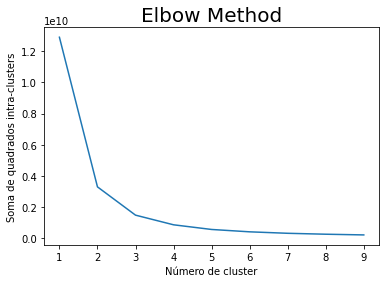

In [ ]:
# gerando o gráfico Elbow Method
sse={}
df_recency = df_customer[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_customer)
    df_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Número de cluster', fontsize=10)
plt.ylabel('Soma de quadrados intra-clusters', fontsize=10)
plt.show()

Aqui parece que 3 é o ideal. Com base nos requisitos de negócios, podemos ir em frente com menos ou mais clusters. Aqui vamos selecionar 4 para este exemplo:

In [ ]:
# construindo 4 clusters para recência e adicionando-os ao dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_customer[['Recency']])
df_customer['RecencyCluster'] = kmeans.predict(df_customer[['Recency']])

# visualizando os clusters de recência
df_customer.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,2205.0,19.771429,14.296459,0.0,8.0,17.0,30.0,51.0
1,598.0,193.018395,31.587023,140.0,166.0,191.0,218.0,250.0
2,497.0,308.486922,39.020935,252.0,274.0,305.0,336.0,373.0
3,1039.0,83.762271,24.367851,52.0,64.0,78.0,100.5,138.0


Podemos ver como nossos clusters de recência têm características diferentes, os clientes do Cluster 0 são muito recentes em comparação com o Cluster 2. Como podemos ver, este conjunto de códigos atribuiu um cluster para cada conjunto de dados, mas a sequência (0 ao 3) não foi gerada de forma ordenada conforme a média dos dados. 

Portanto não podemos dizer que o cluster 0 é o pior e o cluster 3 o melhor. Já o método order_cluster() irá nos auxiliar nesta questão. Ele ordena a atribuição dos clusters conforme os dados, assim conforme podemos ver na sequência, o nosso novo dataframe parece muito mais ordenado:

In [ ]:
# função para ordenar números de cluster
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final
df_customer = order_cluster('RecencyCluster', 'Recency',df_customer,False)

# visualizando os clusters de recência
df_customer.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,497.0,308.486922,39.020935,252.0,274.0,305.0,336.0,373.0
1,598.0,193.018395,31.587023,140.0,166.0,191.0,218.0,250.0
2,1039.0,83.762271,24.367851,52.0,64.0,78.0,100.5,138.0
3,2205.0,19.771429,14.296459,0.0,8.0,17.0,30.0,51.0


Como podemos ver, agora o 3 abrange os clientes mais recentes, enquanto 0 tem os mais inativos. Vamos aplicar esta mesma modelagem desenvolvida nesta etapa aos dados de frequência e valor monetário do nosso dataframe.

#####**Frequência**

Para criar clusters de frequência, primeiro encontrei o número total de pedidos de para cada cliente.Vamos ver como ficou o dataframe de frequência dos pedidos por clientes:

In [ ]:
# gerando um novo dataframe com a frequência de pedidos de cada usuário
df_clean_reset_index = df_clean.reset_index()
df_frequency = df_clean_reset_index.groupby('CustomerID').InvoiceDate.count().reset_index()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


Agora vamos incorporar estas informações ao dataframe principal.

In [ ]:
# adicionando esses dados ao dataframe principal
df_customer = pd.merge(df_customer, df_frequency, on='CustomerID')
df_customer.head()

,CustomerID,Recency,RecencyCluster,Frequency
0,12346,325,0,1
1,12350,310,0,17
2,12361,287,0,10
3,12365,291,0,22
4,12373,311,0,14


Podemos ver na sequência a distribuição da frequência entre os clientes do dataframe.

In [ ]:
# plotando o histograma
plot_data = [go.Histogram(x=df_customer['Frequency'])]
plot_layout = go.Layout(yaxis= {'title': "Quantidade"},xaxis= {'title': "Frequência"},title='Distribuição da Frequência dos clientes')
fig = go.Figure(data=plot_data, layout=plot_layout)
py.iplot(fig)

Nesta etapa apliquei a mesma lógica utilizada na categoria recência para ter clusters de frequência e atribuí isso a cada cliente.

Primeiro vamos determinar quantos clusters precisamos para o algoritmo k-means. Para descobrir, aplicaremos o Elbow Method. O trecho de código e gráfico de inércia podemos ver a seguir:

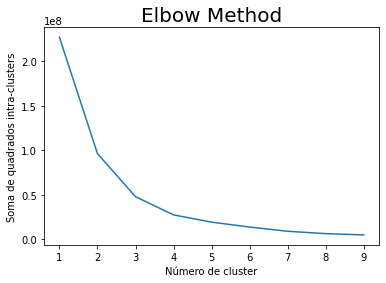

In [ ]:
# gerando gráfico Elbow Method
sse={}
df_frequency = df_customer[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_frequency)
    df_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Número de cluster', fontsize=10)
plt.ylabel('Soma de quadrados intra-clusters', fontsize=10)
plt.show()

Pela análise vamos escolher 4 clusters para frequência. Características de nossos clusters de frequência aparecem abaixo:

In [ ]:
# construindo 4 clusters para frequência e adicionando-os ao dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_customer[['Frequency']])
df_customer['FrequencyCluster'] = kmeans.predict(df_customer[['Frequency']])

# ordenando o cluster de frequência
df_customer = order_cluster('FrequencyCluster', 'Frequency',df_customer,True)

# visualizando os clusters de frequência
df_customer.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3831.0,49.085356,43.977039,1.0,15.00,33.0,72.00,185.0
1,480.0,322.664583,131.064654,186.0,220.75,280.5,382.25,799.0
2,24.0,1323.666667,494.825456,851.0,971.50,1128.0,1535.75,2700.0
3,4.0,5807.750000,1429.386203,4596.0,4982.25,5394.0,6219.50,7847.0


Assim como indicado na notação dos clusters de recência, o número mais alto do cluster de frequência (3) categoriza os melhores clientes.

#####**Monetário**

Vamos ver como nosso banco de dados de clientes se parece quando os agrupamos com base nos valores monetários. Calcularemos a receita de cada cliente, traçaremos um histograma e aplicaremos o mesmo método de agrupamento das categorias anteriores.

In [ ]:
# gerando dataframe de Revenue
df_clean['Revenue'] = df_clean['UnitPrice'] * df_clean['Quantity']
df_revenue = df_clean.groupby('CustomerID').Revenue.sum().reset_index()
df_revenue.head()

,CustomerID,Revenue
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


Agora também vamos incorporar os dados monetários ao dataframe principal.

In [ ]:
# adicionando esses dados ao nosso dataframe principal
df_customer = pd.merge(df_customer, df_revenue, on='CustomerID')
df_customer.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,12346,325,0,1,0,77183.60
1,12350,310,0,17,0,334.40
2,12361,287,0,10,0,189.90
3,12365,291,0,22,0,641.38
4,12373,311,0,14,0,364.60


Podemos ver na sequência a distribuição da frequência entre os clientes do dataframe.

In [ ]:
# gerando o histograma
plot_data = [go.Histogram(x=df_customer.query('Revenue < 10000')['Revenue'])]
plot_layout = go.Layout(yaxis= {'title': "Quantidade"},xaxis= {'title': "Valor Monetário"},title='Distribuição do Valor Monetário dos clientes')
fig = go.Figure(data=plot_data, layout=plot_layout)
py.iplot(fig)

Temos alguns clientes com receita negativa também. Vamos continuar e aplicar o agrupamento k-means:

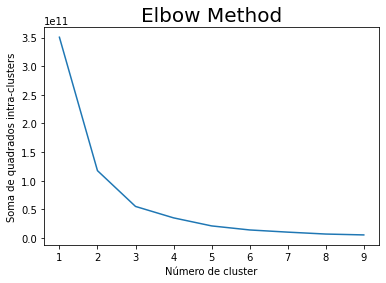

In [ ]:
# gerando gráfico Elbow Method
sse={}
df_revenue = df_customer[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_revenue)
    df_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Número de cluster', fontsize=10)
plt.ylabel('Soma de quadrados intra-clusters', fontsize=10)
plt.show()

Pela análise também vamos escolher 4 clusters para monetário. As características de nossos clusters relacionadas ao valor monetário estão descritas abaixo:

In [ ]:
# k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_customer[['Revenue']])
df_customer['RevenueCluster'] = kmeans.predict(df_customer[['Revenue']])

# ordenando o cluster de receita
df_customer = order_cluster('RevenueCluster', 'Revenue',df_customer,True)

# vendo detalhes de cada cluster
df_customer.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,4301.0,1437.855997,2227.271055,0.00,306.13,664.26,1619.730,21429.39
1,31.0,46393.013871,17870.591823,25977.16,31870.25,40991.57,58668.155,91062.38
2,5.0,149828.502000,31848.698231,117379.63,124914.53,143825.06,168472.500,194550.79
3,2.0,269931.660000,14530.139257,259657.30,264794.48,269931.66,275068.840,280206.02


Assim como indicado na notação dos clusters de recência e frequência, o número mais alto do cluster de valor monetário (3) categoriza os melhores clientes.

#####**Segmentação geral**

Com os dados e os números de cluster de recência, frequência e valor monetário preparados, vamos fazer a segmentação geral deles. Nesta etapa conseguiremos analisar visualmente a distribuição destes grupos de forma combinada e categorizada.

Para fazer a segmentação adequada de nossos clientes, usaremos clusters de clientes conforme suas respectivas pontuações, que chamaremos de:

* **Ouro** - 5+;
* **Prata** - 3 a 4;
* **Bronze** - 0 a 2.

In [ ]:
# calculando a pontuação geral e usando a média para ver seus detalhes
df_customer['OverallScore'] = df_customer['RecencyCluster'] + df_customer['FrequencyCluster'] + df_customer['RevenueCluster']
df_customer.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,308.329960,22.757085,395.435729
1,193.993255,32.534570,710.521030
2,84.707341,45.844246,1038.410925
3,22.828732,69.179718,1398.081319
4,13.672170,323.549528,5547.215825
5,7.774194,812.225806,27853.593871
6,7.857143,1268.285714,87140.872857
7,2.800000,3877.000000,103382.604000
8,1.000000,3878.500000,212015.540000


A pontuação acima nos mostra claramente que os clientes com pontuação 8 são nossos melhores clientes, enquanto 0 é o pior.

Para manter as coisas simples, melhor nomearmos essas pontuações conforme as categorias descritas inicialmente (bronze, prata e ouro). Podemos facilmente aplicar essa nomeação em nosso dataframe:

In [ ]:
# atribuido as categoria para cada cliente
df_customer['Segment'] = 'Bronze'
df_customer.loc[df_customer['OverallScore']>2,'Segment'] = 'Prata' 
df_customer.loc[df_customer['OverallScore']>4,'Segment'] = 'Ouro' 

Tendo as categorias já pré-definidas, conseguimos agora fazer uma segmentação  geral do dataframe de clientes, conforme estabelecido nas premissas deste estudo.

In [ ]:
# visualizando os primeiro e últimos dados do novo dataframe categorizado
df_customer

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,12346,325,0,1,0,77183.60,1,1,Bronze
1,12931,21,3,82,0,42055.96,1,4,Prata
2,15769,7,3,130,0,56252.72,1,4,Prata
3,15838,11,3,167,0,33643.08,1,4,Prata
4,16013,3,3,139,0,37130.60,1,4,Prata
...,...,...,...,...,...,...,...,...,...
4334,17450,8,3,337,1,194550.79,2,6,Ouro
4335,14911,1,3,5677,3,143825.06,2,8,Ouro
4336,14156,9,3,1400,2,117379.63,2,7,Ouro
4337,18102,0,3,431,1,259657.30,3,7,Ouro


Outra análise importante à ser feita nesta etapa é descobrir quantos clientes ficaram em cada categoria. Este levantamento podemos ver na sequência.

In [ ]:
# visualizando a quantodade de clientes por segmento
df_customer.groupby('Segment')['OverallScore'].count()

Segment
Bronze    2095
Ouro        45
Prata     2199
Name: OverallScore, dtype: int64

Agora é a melhor parte, vamos ver como nossos segmentos se distribuíram em um gráfico de dispersão interativo, onde é possível acessar diversos dados correspondentes à visualização plotada.

In [ ]:
# definindo intervalo de valores da visualização
df_graph = df_customer.query("Revenue < 50000 and Frequency < 2000")

# definindo os parâmetos e dados do gráfico de dispersão
plot_data = [
    go.Scatter(x=df_graph.query("Segment == 'Bronze'")['Recency'],y=df_graph.query("Segment == 'Bronze'")['Revenue'],mode='markers',name='Bronze',marker= dict(size= 8,line= dict(width=1),color= 'brown',opacity= 0.8)),
    go.Scatter(x=df_graph.query("Segment == 'Prata'")['Recency'],y=df_graph.query("Segment == 'Prata'")['Revenue'],mode='markers',name='Prata',marker= dict(size= 8,line= dict(width=1),color= 'gray',opacity= 0.5)),
    go.Scatter(x=df_graph.query("Segment == 'Ouro'")['Recency'],y=df_graph.query("Segment == 'Ouro'")['Revenue'],mode='markers',name='Ouro',marker= dict(size= 8,line= dict(width=1),color= 'yellow',opacity= 0.9)),
    ]

# plotando o gráfico
plot_layout = go.Layout(yaxis= {'title': "Monetário"},xaxis= {'title': "Recência"},title='Segmentação dos clientes conforme o valor monetário e a recência')
fig = go.Figure(data=plot_data, layout=plot_layout)
py.iplot(fig)

In [ ]:
# definindo intervalo de valores da visualização
df_graph = df_customer.query("Revenue < 50000 and Frequency < 2000")

# definindo os parâmetos e dados do gráfico de dispersão
plot_data = [
  go.Scatter(x=df_graph.query("Segment == 'Bronze'")['Frequency'],y=df_graph.query("Segment == 'Bronze'")['Revenue'],mode='markers',name='Bronze',marker= dict(size= 8,line= dict(width=1),color= 'brown',opacity= 0.8)),
  go.Scatter(x=df_graph.query("Segment == 'Prata'")['Frequency'],y=df_graph.query("Segment == 'Prata'")['Revenue'],mode='markers',name='Prata',marker= dict(size= 8,line= dict(width=1),color= 'gray',opacity= 0.5)),
  go.Scatter(x=df_graph.query("Segment == 'Ouro'")['Frequency'],y=df_graph.query("Segment == 'Ouro'")['Revenue'],mode='markers',name='Ouro',marker= dict(size= 8,line= dict(width=1),color= 'yellow',opacity= 0.9)),
  ]

# plotando o gráfico
plot_layout = go.Layout(yaxis= {'title': "Monetário"},xaxis= {'title': "Frequência"},title='Segmentação dos clientes conforme o valor monetário e a frequência')
fig = go.Figure(data=plot_data, layout=plot_layout)
py.iplot(fig)

In [ ]:
# definindo intervalo de valores da visualização
df_graph = df_customer.query("Revenue < 50000 and Frequency < 2000")

# definindo os parâmetos e dados do gráfico de dispersão
plot_data = [
    go.Scatter(x=df_graph.query("Segment == 'Bronze'")['Recency'],y=df_graph.query("Segment == 'Bronze'")['Frequency'],mode='markers',name='Bronze',marker= dict(size= 8,line= dict(width=1),color= 'brown',opacity= 0.8)),
    go.Scatter(x=df_graph.query("Segment == 'Prata'")['Recency'],y=df_graph.query("Segment == 'Prata'")['Frequency'],mode='markers',name='Prata',marker= dict(size= 8,line= dict(width=1),color= 'gray',opacity= 0.5)),
    go.Scatter(x=df_graph.query("Segment == 'Ouro'")['Recency'],y=df_graph.query("Segment == 'Ouro'")['Frequency'],mode='markers',name='Ouro',marker= dict(size= 8,line= dict(width=1),color= 'yellow',opacity= 0.9)),
    ]

# plotando o gráfico
plot_layout = go.Layout(yaxis= {'title': "Frequência"},xaxis= {'title': "Recência"},title='Segmentação dos clientes conforme a frequência e a recência')
fig = go.Figure(data=plot_data, layout=plot_layout)
py.iplot(fig)

Como pode-se observar nos gráficos de dispersão plotados, os segmentos são claramente diferenciados uns dos outros, o que indica uma eficácia no modelo de segmentação desenvolvido. Com base nisso, podemos entender o padrão de comportamento de cada segmento de clientes.

## Conclusão


Conforme constatamos, não se trata de um problema trivial. Apesar de os dados estarem bem tratados, houve a necessidade de limpeza de valores ausentes, assim como o de feature engineering e uma análise exploratória para buscar diversos insights, o que demandou um trabalho considerável.

O estudo atendeu de forma satisfatória os objetivos propostos nas premissas deste trabalho. Obviamente, apesar do resultado final, há espaço para testar outras formas de segmentação, além de otimização de seus parâmetros.

Tendo esta segmentação concluída, podemos começar a tomar ações com este estudo. As principais estratégias são bastante claras:

* **Ouro**: Aumentar a quantidade de clientes nesta categoria;
* **Prata**: Melhorar os valores monetários assim como as frequências de compras;
* **Bronze**: Melhorar as três categorias avaliadas: os valores monetários, a frequência e a recência das compras.

Aplicando estes conceitos, podemos direcionar as ações de melhoria de desempenho de vendas de uma forma mais assertiva e identificando onde se enquadra cada cliente dentre os segmentos estabalecidos.